In [1]:
import json
import re

with open('valuedWords.txt', 'r', encoding='UTF-8') as f:
    valuedWords = f.readlines()
    valuedWords = [
        x
        for x in [x[:-1] if x != valuedWords[-1] else x for x in valuedWords]
        if x
    ]

with open('normal_words.txt', 'r', encoding='UTF-8') as f:
    givenWords = f.readlines()
    givenWords = ' '.join(givenWords).split()

def remove_non_alpha(word):
    return ''.join(char for char in word if char.isalpha())

parsed_words = [remove_non_alpha(word) for word in givenWords]

givenWords = list(filter(None, parsed_words))

In [2]:
def levenshtein_distance(s, t):
    m = len(s)
    n = len(t)
    d = [[0] * (n + 1) for i in range(m + 1)]
    for i in range(m + 1):
        d[i][0] = i
    for j in range(n + 1):
        d[0][j] = j
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j] + 1, d[i][j - 1] + 1, d[i - 1][j - 1] + 1)
    return d[m][n]


def correct_spelling(word, valued_words, barrier):
    if word == '':
        closest_word = ''
    else:
        distances = [(levenshtein_distance(word, w), w) for w in valued_words]
        # print(sorted(distances))
        closest_word = min(distances)[1]
        handled_closest = f"{word} -- {closest_word} -- {min(distances)[0]}/{len(closest_word)} -- {int((round((min(distances)[0] / len(closest_word)) * 100, 0)))}%"
        handled_word = f"{word} -- {min(distances)[0]}/{len(closest_word)} -- {int((round((min(distances)[0] / len(closest_word)) * 100, 0)))}%    ----- {closest_word}"
        if int((round((min(distances)[0] / len(closest_word)) * 100, 0))) < barrier:
            return handled_closest, 0
        return handled_word, 1

changed_list = []
original_list = []

In [8]:
barriers = [5, 10, 15, 20, 25, 30, 35, 40]
changed_lens = []

for barrier in barriers:
    for word in givenWords:
        temp = correct_spelling(word, valuedWords, barrier)
        if temp[1]:
            original_list.append(temp[0])
        else:
            changed_list.append(temp[0])
    changed_lens.append(len(changed_list))

changed_lens

[1131, 1131, 1131, 1133, 1142, 1164, 1237, 1329]

In [16]:
changed_lens = [1131, 1131, 1131, 1133, 1142, 1164, 1237, 1329]
changed_lens = [item / 5547 for item in changed_lens]
changed_lens

[0.2038939967550027,
 0.2038939967550027,
 0.2038939967550027,
 0.20425455201009554,
 0.20587705065801334,
 0.20984315846403462,
 0.2230034252749234,
 0.23958896700919416]

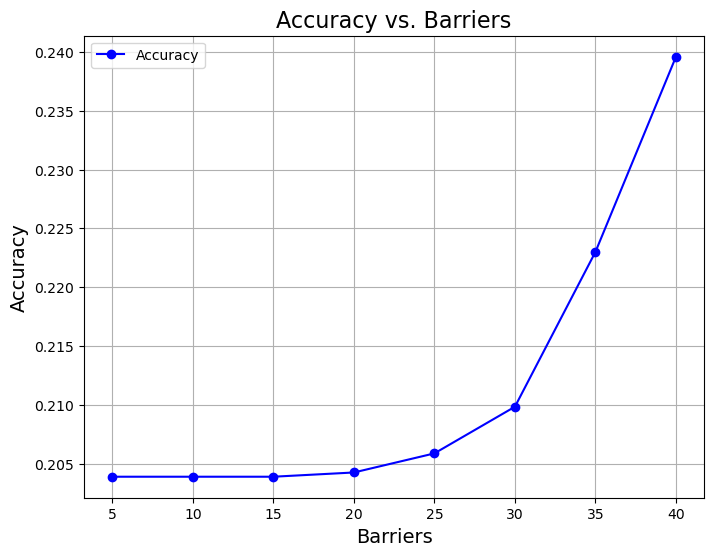

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(barriers, changed_lens, marker='o', linestyle='-', color='b', label='Accuracy')

plt.title('Accuracy vs. Barriers', fontsize=16)
plt.xlabel('Barriers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

In [21]:
with open('original_list.txt', 'w', encoding='UTF-8') as file:
    file.write('Original list\n')
    file.write('original_word | distance | distance_% | closest_word\n')
    for elem in original_list:
        file.write(elem + '\n')

with open('changed_list.txt', 'w', encoding='UTF-8') as file:
    file.write('Changed list\n')
    file.write('original_word | closest_word | distance | distance_%\n')
    for elem in changed_list:
        file.write(elem + '\n')